# Recommendation system

## 1) Installing and importing packages

In [ ]:
"""!pip install requests
!pip install googletrans==3.1.0a0
!pip install geopy"""

In [96]:
from geo_flask import hi

In [97]:
hi()

hohoho


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
import math
from googletrans import Translator 
import requests
import json
import time
from tqdm.auto import tqdm
import math
import os, os.path

import ast
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
# needed for nltk.pos_tag function nltk.download(’averaged_perceptron_tagger’)
nltk.download('wordnet')


from gensim.models import Word2Vec
import gensim
import gensim.downloader

import matplotlib.pyplot as plt
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
import seaborn as sns

from collections import Counter

import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium import Marker
import warnings 
from geopy.geocoders import Nominatim

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors



import os
import urllib.request
from scipy import spatial
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm



plt.style.use('dark_background')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedewva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedewva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmedewva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2) Combining csvs

In [2]:
def factoring_address(address_dict):
        elements = ['street','zip', 'city', 'state', 'country', 'other']
        address = ''
        try: 
            for i in elements:
                    if not (address_dict[i] == None):
                            address += address_dict[i]+ ", "
            
            return address[:-2]
        except:
            return None

def converting_to_dataframe(json_path):
    with open(json_path) as json_file:
        data_list = json.load(json_file)
    for i in range(len(data_list)):
        data_list[i]['address'] = factoring_address(data_list[i]['address'])

    df = pd.DataFrame(data_list, columns =["id", "name", "description", "number_of_employees", "seo_description", "annual_revenue_estimation", "revenue_currency", "address", "founding_year", "languages_spoken_at_company", "headquarter_location_geo_code_json", "geo_lon", "geo_lat", "industries", "keywords"])
 
    return df

def combining_to_one_csv(n, directory):
    json_path = "jsons/results_0.json"
    df_full = converting_to_dataframe(json_path)
    for i in tqdm(list(range(1,n))):
        json_path = f"jsons/results_{i}.json"
        df_tmp = converting_to_dataframe(json_path)
        df_full = pd.concat([df_full, df_tmp])
    df_full.to_csv(directory, index=False) 
    return df_full

In [ ]:
"""combining_to_one_csv(2846,'csvs/companies_full.csv')
len(os.listdir('jsons'))"""

  0%|          | 0/2533 [00:00<?, ?it/s]

2603

In [2]:
df_full = pd.read_csv(f"csvs/companies_full 3.csv",low_memory=False, lineterminator='\n')
#df_full_ = pd.read_csv(f"csvs/companies_full 2.csv",low_memory=False, lineterminator='\n')



In [74]:
df_full.shape

(2846000, 15)

In [78]:
df_full.head(5)

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,address,founding_year,languages_spoken_at_company,geo_lon,geo_lat,industries,keywords,revenue_currency,headquarter_location_geo_code_json
0,10293,Renesas Electronics Corporation,Renesas Electronics Corporation is a Japanese ...,10000,"A global leader in microcontrollers, analog, p...",1.000000e+09,"2880 Scott Blvd, 135-0061, Koto City, Tokyo, J...",2002,"['English', 'Chinese']",-121.959064,37.372658,"['Halbleiter', 'marketing', 'information_techn...","['hardware', 'information technology', 'semico...",NaN,NaN
1,10294,Klüber Lubrication München SE & Co. KG,Benefit from our comprehensive range of specia...,5000,"Benefíciese de nuestra consultoría experta, de...",1.000000e+07,"7 Geisenhausenerstraße, 03053, München, Bayern...",1929,NaN,NaN,NaN,"['Chemieindustrie', 'Chemikalien', 'Wälzlagerf...","['ceras lubrificantes', 'lubrificantes especia...",NaN,NaN
2,10295,RHINE BUSINESS CONSULTING,Als unabhängiges Beratungshaus unterstützen wi...,10,Kompetenz in Business Development und Digitali...,2.000000e+06,"55270, Jugenheim, Deutschland",2015,NaN,NaN,NaN,"['Management Beratung', 'Management Beratung']","['it interim project management', 'big data am...",NaN,NaN
3,10296,EMIL,Zahle pro gefahrenem Kilometer Spare bis zu 45...,50,"Versicherer nutzen die EMIL Insurance Suite, u...",1.000000e+07,"94103, Berlin, Lower Saxony, Germany",2017,NaN,NaN,NaN,"['Versicherung', 'Insurance company']",NaN,NaN,NaN
4,10297,Carnival Maritime,Carnival Maritime is the Marine Service Unit o...,500,NaN,5.000000e+07,"9 Großer Grasbrook, 20457, Hamburg, Hamburg, G...",2015,NaN,9.993667,53.542124,"['Seeschiffahrt und maritime Wirtschaft', 'ope...","['maritime', 'maritime]']",NaN,NaN


In [85]:
df_full.iloc[-50450:-50400,]

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,address,founding_year,languages_spoken_at_company,geo_lon,geo_lat,industries,keywords,revenue_currency,headquarter_location_geo_code_json
2795550,3046813,Shinywing,Spécialistes européens Shinywing pour les pièc...,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795551,3046814,Shiokcollection,Shiok Collection is a wholesaler and retailer ...,NaN,NaN,196560.0,Malaysia,NaN,NaN,NaN,NaN,['E-Commerce'],[],NaN,NaN
2795552,3046815,Shionsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795553,3046816,Ship-Models,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795554,3046817,ship247post.vn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795555,3046818,Shipbliy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795556,3046819,shiphangviettrung.com,"ship hàng việt trung, mua hàng trung quốc, ord...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795557,3046820,shipli.ru,Shipli.ru -Шипли - интернет магазин элитной са...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795558,3046821,Shipmatetwll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
2795559,3046822,shipmodels.gr,"Model ships , μοντελα πλοίων επιβατικά , εμπορ...",NaN,NaN,NaN,Griechenland,NaN,NaN,NaN,NaN,[],[],NaN,NaN


In [80]:
df_full.tail(5)

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,revenue_currency,address,founding_year,languages_spoken_at_company,headquarter_location_geo_code_json,geo_lon,geo_lat,industries,keywords
2533995,2784856,The Primal Center,"Ken Seman, LCSW, Director Dr Arthur Janov, Fou...",10,NaN,1000000.0,NaN,"209 Ashland Avenue, 90405, Santa Monica, CA, U...",1989,['English'],NaN,-121.010331,39.283378,['Rundfunkmedien'],['broadcast media]']
2533996,2784857,SM Rör Och Bygg AB,Vi tror på en öppen och tydlig kommunikation m...,10,NaN,1000000.0,NaN,"Malmö, Skane County, Schweden",2012,NaN,NaN,NaN,NaN,['Bauwesen und Konstruktion'],"['bygg', 'vvs', 'kakelklinker', 'badrum', 'con..."
2533997,2784858,FiberNet Telecom,Na FiberNet buscamos Construir um ecossistema ...,10,NaN,10000000.0,NaN,Brazil,2012,NaN,NaN,NaN,NaN,"['Telekommunikation', 'telecommunications']",['telecommunications]']
2533998,2784859,The Sirius Library,The Sirius Library – the website for new educa...,7,"No more Divine than you, yet truly Divine I Am...",NaN,NaN,"12 Bayshore Drive, Australia",NaN,['English'],NaN,NaN,NaN,"['Religiöse Institutionen', 'education', 'engi...",['religious institutions]']
2533999,2784860,habilidad.es,habilidad.es te ayudamos con el #MarketingDigi...,10,Web de habilidad.es Proyecto de formación y co...,1000000.0,NaN,Spain,2012,['Spanish'],NaN,NaN,NaN,['marketing'],"['seo', 'sem', 'redes sociales', 'campanas onl..."


In [77]:
def replace_by_nan(row):
    if (row == '[]'):
        row = math.nan
    return row

#df_test = df_full.head(5)
df_full["keywords"] = df_full["keywords"].apply(lambda row : replace_by_nan(row))
df_full["industries"] = df_full["industries"].apply(lambda row : replace_by_nan(row))


KeyError: 'keywords'

In [ ]:
df_full.head(6)

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,revenue_currency,address,founding_year,languages_spoken_at_company,headquarter_location_geo_code_json,geo_lon,geo_lat,industries,keywords
0,10293,Renesas Electronics Corporation,Renesas Electronics Corporation is a Japanese ...,10000,"A global leader in microcontrollers, analog, p...",1.000000e+09,NaN,"2880 Scott Blvd, 135-0061, Koto City, Tokyo, J...",2002,"['English', 'Chinese']",NaN,-121.959064,37.372658,"['Halbleiter', 'marketing', 'information_techn...","['hardware', 'information technology', 'semico..."
1,10294,Klüber Lubrication München SE & Co. KG,Benefit from our comprehensive range of specia...,5000,"Benefíciese de nuestra consultoría experta, de...",1.000000e+07,NaN,"7 Geisenhausenerstraße, 03053, München, Bayern...",1929,NaN,NaN,NaN,NaN,"['Chemieindustrie', 'Chemikalien', 'Wälzlagerf...","['ceras lubrificantes', 'lubrificantes especia..."
2,10295,RHINE BUSINESS CONSULTING,Als unabhängiges Beratungshaus unterstützen wi...,10,Kompetenz in Business Development und Digitali...,2.000000e+06,NaN,"55270, Jugenheim, Deutschland",2015,NaN,NaN,NaN,NaN,"['Management Beratung', 'Management Beratung']","['it interim project management', 'big data am..."
3,10296,EMIL,Zahle pro gefahrenem Kilometer Spare bis zu 45...,50,"Versicherer nutzen die EMIL Insurance Suite, u...",1.000000e+07,NaN,"94103, Berlin, Lower Saxony, Germany",2017,NaN,NaN,NaN,NaN,"['Versicherung', 'Insurance company']",NaN
4,10297,Carnival Maritime,Carnival Maritime is the Marine Service Unit o...,500,NaN,5.000000e+07,NaN,"9 Großer Grasbrook, 20457, Hamburg, Hamburg, G...",2015,NaN,NaN,9.993667,53.542124,"['Seeschiffahrt und maritime Wirtschaft', 'ope...","['maritime', 'maritime]']"
5,10298,djd deutsche journalisten dienste GmbH & Co. KG,djd deutsche journalisten dienste GmbH & Co. K...,50,Wir machen Sie mit Content Marketing deutschla...,NaN,NaN,"97234, Reichenberg, Bayern, Deutschland",1989,NaN,NaN,NaN,NaN,"['Medienproduktion', 'Business And Industrial']",NaN


## 3) Analyzing and cleaning the dataset

In [3]:
companies_isna_stats = df_full.isna().sum() / df_full.shape[0] * 100
companies_isna_stats

id                                      0.000000
name                                    0.000387
description                             7.709944
number_of_employees                     9.291954
seo_description                        57.704779
annual_revenue_estimation              23.625966
address                                 4.058573
founding_year                          33.130464
languages_spoken_at_company            43.747400
geo_lon                                42.654989
geo_lat                                42.654989
industries                              6.536507
keywords                               15.876915
revenue_currency                       99.999965
headquarter_location_geo_code_json    100.000000
dtype: float64

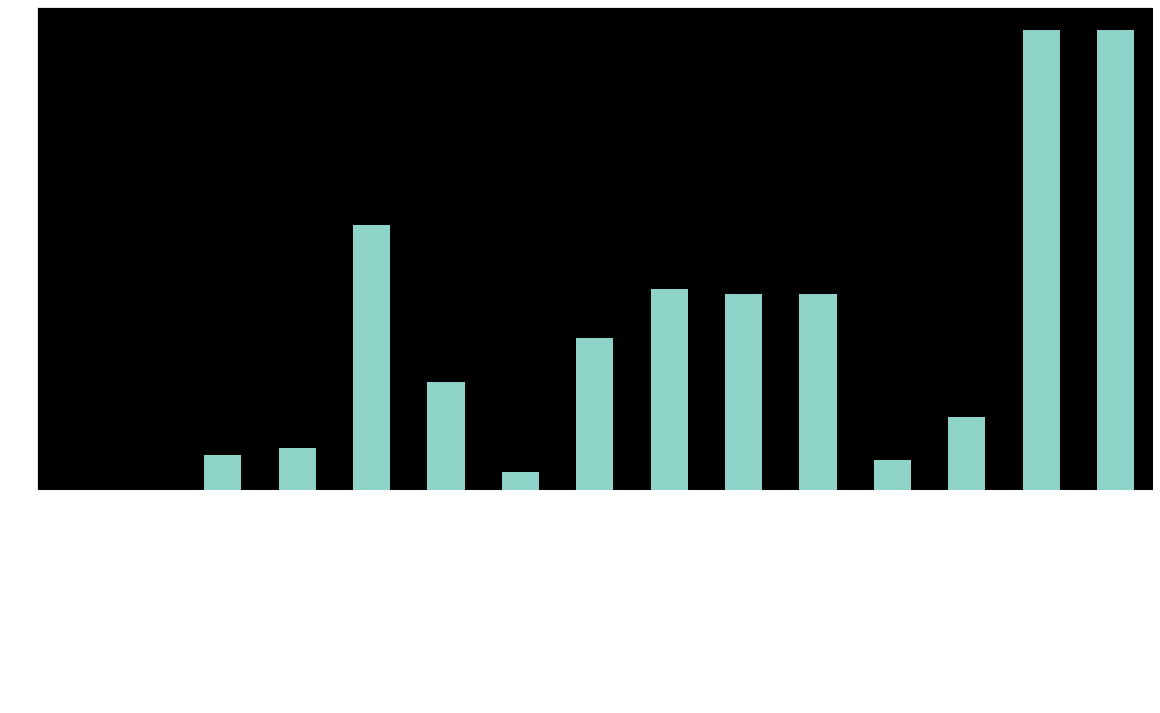

In [4]:
fig = plt.figure(figsize=(18, 8), dpi=80)
companies_isna_stats.plot.bar()
plt.show()

In [5]:
df_full = df_full.drop(columns=['revenue_currency', 'headquarter_location_geo_code_json'])

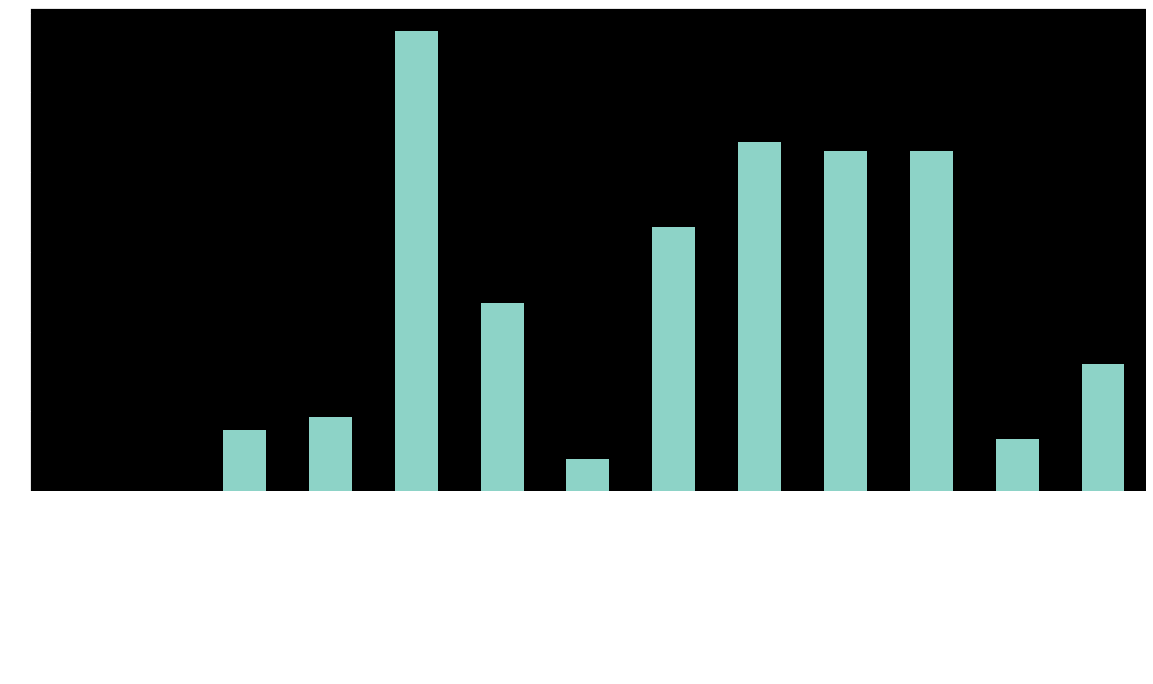

In [7]:
companies_isna_stats = df_full.isna().sum() / df_full.shape[0] * 100
fig = plt.figure(figsize=(18, 8), dpi=80)
companies_isna_stats.plot.bar()
plt.show()

In [100]:
companies_df = df_full
toy_df = df_full.head(50000)

## 4) Language processing

In [ ]:
"""
Plan
1) Get description column 
2) Drop nan description
3) Translate to english
4) Lowercase, nltk, tokenizing, drop some words
5) Apply tfidf and get similarity
6) Word2vec and similarity
"""

#### Get description

In [101]:
descriptions = df_full["description"].values
print(len(descriptions))
toy_desc = toy_df["description"].values
toy_desc_seo = toy_df["seo_description"].values

2846000


In [ ]:
def check_nan(descs):
    #checks whether a description is nan or not
    #returns an array of True or False
    out = []
    for ele in descs:
        if (type(ele)==str):
            out.append(False)
        else:
            if (math.isnan(ele)):
                out.append(True)
    return np.array(out)

In [ ]:
print(math.isnan(toy_desc_seo[85]))
print(type(toy_desc_seo))

TypeError: must be real number, not str

In [78]:
arr = check_nan(toy_desc_seo)
print(np.sum(arr))

NameError: name 'check_nan' is not defined

In [79]:
def similar (stc1, stc2):
    return True

def concatenate_descriptions(desc, seo_desc):
    if ((not type(desc) == str) and (not type(desc)==str)):
        return math.nan
    elif ((not type(seo_desc)==str)):
        return desc
    elif ((not type(desc) == str)):
        return seo_desc
    else:
        if (similar(desc,seo_desc)):
            return desc
        else:
            return desc+ ' '+ seo_desc


#### Drop nan descriptions

In [102]:
from tqdm.autonotebook import tqdm
tqdm.pandas()
toy_df = toy_df.dropna(subset=['description'])
toy_df.shape

(48978, 15)

In [103]:
toy_df.head()

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,address,founding_year,languages_spoken_at_company,geo_lon,geo_lat,industries,keywords,revenue_currency,headquarter_location_geo_code_json
0,10293,Renesas Electronics Corporation,Renesas Electronics Corporation is a Japanese ...,10000,"A global leader in microcontrollers, analog, p...",1.000000e+09,"2880 Scott Blvd, 135-0061, Koto City, Tokyo, J...",2002,"['English', 'Chinese']",-121.959064,37.372658,"['Halbleiter', 'marketing', 'information_techn...","['hardware', 'information technology', 'semico...",NaN,NaN
1,10294,Klüber Lubrication München SE & Co. KG,Benefit from our comprehensive range of specia...,5000,"Benefíciese de nuestra consultoría experta, de...",1.000000e+07,"7 Geisenhausenerstraße, 03053, München, Bayern...",1929,NaN,NaN,NaN,"['Chemieindustrie', 'Chemikalien', 'Wälzlagerf...","['ceras lubrificantes', 'lubrificantes especia...",NaN,NaN
2,10295,RHINE BUSINESS CONSULTING,Als unabhängiges Beratungshaus unterstützen wi...,10,Kompetenz in Business Development und Digitali...,2.000000e+06,"55270, Jugenheim, Deutschland",2015,NaN,NaN,NaN,"['Management Beratung', 'Management Beratung']","['it interim project management', 'big data am...",NaN,NaN
3,10296,EMIL,Zahle pro gefahrenem Kilometer Spare bis zu 45...,50,"Versicherer nutzen die EMIL Insurance Suite, u...",1.000000e+07,"94103, Berlin, Lower Saxony, Germany",2017,NaN,NaN,NaN,"['Versicherung', 'Insurance company']",NaN,NaN,NaN
4,10297,Carnival Maritime,Carnival Maritime is the Marine Service Unit o...,500,NaN,5.000000e+07,"9 Großer Grasbrook, 20457, Hamburg, Hamburg, G...",2015,NaN,9.993667,53.542124,"['Seeschiffahrt und maritime Wirtschaft', 'ope...","['maritime', 'maritime]']",NaN,NaN


In [104]:
descriptions = toy_df.loc[ :,['id','description']]

In [85]:
descriptions.head()

,id,description
0,1106,With the softgarden's Talent Acquisition Suite...
1,1107,EquensWorldline is a financial services compan...
2,1108,Advantech is a leading brand in IoT intelligen...
3,1109,"Wissen Sie, welcher Dachverband kleine und gro..."
4,1110,Die starken Unternehmensberater und Unternehme...


#### Translate to english


In [ ]:
## Get stats about languages
"""langs_dict = {}
ids = []
for i,item in enumerate(descriptions):
    if (isinstance(item, str)==False):
        langs_dict[i] = 'nan'
    else:
        try:
            langs_dict[i] = detect(item)
        except:
            langs_dict[i] = "non_str"
            ids.append(i)



d = Counter(langs_dict.values())

fig = plt.figure(figsize=(20, 10), dpi=80)
plt.bar(d.keys(),d.values())
plt.show()"""

In [105]:
translator = Translator()
def translate_to_english(desc):
    try:
        lang = detect(desc)
    except:
        print(desc)
        return 'none'
    if (lang == 'en'):
        return desc
    else :
        if (type(lang)==str and lang!='nan'):
            return translator.translate(desc, dest='en').text
        return ''

    

In [106]:
descriptions_en = descriptions.copy()

In [107]:
descriptions_en['description'] = descriptions_en['description'].apply(lambda row : translate_to_english(row))

In [89]:
print(descriptions_en.shape)
descriptions_en.drop(descriptions_en[descriptions_en['description'] == ''].index, inplace = True)
print(descriptions_en.shape)

(47897, 2)
(47897, 2)


In [90]:
descriptions_en.head(5)

,id,description
0,1106,With the softgarden's Talent Acquisition Suite...
1,1107,EquensWorldline is a financial services compan...
2,1108,Advantech is a leading brand in IoT intelligen...
3,1109,Do you know which umbrella organization succes...
4,1110,The strong business consultants and business d...


#### Lowercase, nltk, tokenizing, drop some words


In [20]:
stop_words = stopwords.words('english')
def normalize(tokenized_text):
    clean_token=[]
    for token in tokenized_text:
        token = token.lower()
        # remove any value that are not alphabetical
        new_token = re.sub(r'[^a-zA-Z]+', ' ', token) 
        # remove empty value and single character value
        if new_token != "" and len(new_token) >= 2: 
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0: # remove line that only contains consonants
                clean_token.append(new_token)
    return clean_token

def removing_stopwords(normalized_text, stop_words):
     # Extend stop-words
    stop_words.extend(["could","though","would","also","many",'much', 'inc', 'imprint', 'co'])
    # Remove the stopwords from the list of tokens
    tokens = [x for x in normalized_text if x not in stop_words]
    return tokens

def processing_text(description, stop_words):
    tokenized_description = WordPunctTokenizer().tokenize(description)
    normalized_description = normalize(tokenized_description)
    removed_stop_words_description = removing_stopwords(normalized_description, stop_words)
    return removed_stop_words_description

def lemmatizing(removed_stopwords):
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word and display the output
    lemmatize_text = []
    for word in removed_stopwords:
        output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'), lemmatizer.lemmatize(word, pos='v')]
        lemmatize_text.append(output)
    return lemmatize_text



In [92]:
descriptions_tokens = descriptions_en.copy()

In [93]:
descriptions_tokens['description'] = descriptions_tokens['description'].apply(lambda row : processing_text(row, stop_words))

In [95]:
descriptions_en.head()

,id,description
0,1106,With the softgarden's Talent Acquisition Suite...
1,1107,EquensWorldline is a financial services compan...
2,1108,Advantech is a leading brand in IoT intelligen...
3,1109,Do you know which umbrella organization succes...
4,1110,The strong business consultants and business d...


In [96]:
descriptions_tokens.head()

,id,description
0,1106,"[softgarden, talent, acquisition, suite, inspi..."
1,1107,"[equensworldline, financial, services, company..."
2,1108,"[advantech, leading, brand, iot, intelligent, ..."
3,1109,"[know, umbrella, organization, successfully, c..."
4,1110,"[strong, business, consultants, business, deve..."


In [97]:
descriptions_tokens.to_csv("descriptions_tokens.csv")

#### Apply tfidf and get similarity


In [98]:
descriptions_list = list(descriptions_tokens['description'].values)

In [21]:
def get_corpus_counts(descriptions_list):
    l = []
    for desc in descriptions_list:
        l += desc
    return Counter(l)

def get_multiple_appearence_words(dict):
    corpus = []
    for i, (key,value) in enumerate(dict.items()):
        if (value>1):
            corpus.append(key)
    return corpus

def get_number_of_occ(word, description):
    i=0
    for ele in description:
        if (ele == word):
            i+=1
    return i

def get_bag_of_word_matrix(descriptions_list, corpus):
    n = len(descriptions_list)
    m = len(corpus)
    mat = np.zeros((n,m))
    for i in tqdm(range(n)):
        for j in range(m):
            mat[i,j]=get_number_of_occ(corpus[j], descriptions_list[i])
    return mat

In [22]:
corpus = get_multiple_appearence_words(get_corpus_counts(descriptions_list))
bow_mat = get_bag_of_word_matrix(descriptions_list, corpus)
print(len(corpus))

NameError: name 'descriptions_list' is not defined

In [ ]:
print(corpus[:10])

['talent', 'acquisition', 'suite', 'inspire', 'hire', 'best', 'candidates', 'faster', 'candidate', 'management']


In [225]:
bow_mat.shape

(47897, 26163)

In [226]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(bow_mat)
tf_idf_vector=tfidf_transformer.transform(bow_mat)

In [ ]:
print(type(tf_idf_vector))

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
"""tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(descriptions)"""
cosine_sim = linear_kernel(tf_idf_vector, tf_idf_vector)

In [ ]:
print(cosine_sim[:5,:5])

[[1.         0.         0.01933774 0.         0.        ]
 [0.         1.         0.         0.         0.0332308 ]
 [0.01933774 0.         1.         0.         0.07390997]
 [0.         0.         0.         1.         0.        ]
 [0.         0.0332308  0.07390997 0.         1.        ]]


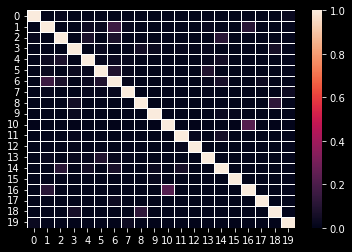

In [ ]:
ax = sns.heatmap(cosine_sim[:20,:20], linewidth=0.5)
plt.show()

#### PCA after tfidf

In [227]:
x_desc = tf_idf_vector.toarray()

In [228]:
x_desc = StandardScaler().fit_transform(x_desc)

In [229]:
pca_desc = PCA(n_components=6)

In [ ]:
pca_desc.fit(x_desc)

In [ ]:
pc_desc = pca_desc.transform(x)

#### Word2vec and similarity


In [ ]:
#urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7f9af87f5370>)

In [ ]:
word2_vec_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
print(len(word2_vec_vectors))
print(len(word2_vec_vectors["hi"]))

3000000
300


In [23]:
def get_description_embedding_avg(description, emmbed_dict, embed_dim):
    n = len(description)
    embedding = np.zeros(embed_dim)
    for i, ele in enumerate(description):
        try:
            embedding += emmbed_dict[ele]
        except:
            pass
    return embedding/n

def get_description_embedding_max(description, emmbed_dict, embed_dim):
    n = len(description)
    embedding = np.zeros(embed_dim)
    for i, ele in enumerate(description):
        try:
            embedding = np.maximum(embedding, emmbed_dict[ele])
        except:
            pass
    return embedding
    
def cosine(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

def get_embedding_dict (path):
  emmbed_dict = {}
  with open(path,'r') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:],'float32')
      emmbed_dict[word]=vector
  return emmbed_dict

def get_all_embedding(descriptions_, embed_fun, embed_dict, embed_dim ):
    vectors =[]
    for ele in tqdm(descriptions_):
        vectors.append(embed_fun(ele,embed_dict,embed_dim))
    return vectors

In [24]:
path_glv_300 = 'glove.6B/glove.6B.300d.txt'
path_glv_100 = 'glove.6B/glove.6B.100d.txt'
path_glv_50 = 'glove.6B/glove.6B.50d.txt'
embed_glv_300 = get_embedding_dict(path_glv_300)
embed_glv_100 = get_embedding_dict(path_glv_100)
embed_glv_50 = get_embedding_dict(path_glv_50)


In [ ]:
len(embed_glv_300)

400000

In [ ]:
test_desc = descriptions_list[0]

In [ ]:
l = 0
k = 0
for j in range (len(descriptions_list)):
    for i in descriptions_list[j]:
        try:
            word2_vec_vectors[i]
            k += 1
        except:
            l += 1
            print(i)
print(l, k)

softgarden
equensworldline
advantech
jungheinrich
epam
belarusian
mongodb
mongodb
nosql
grabarz
sunexpress
antalya
izmir
bulgaria
schott
viessmann
hypercolour
cedric
vibert
garnier
troxler
teradata
winstanley
fenthum
mitte
pijp
anjla
sirva
oakbrook
imx
forto
tamcaips
admetrics
bigdata
devops
windhoff
serviceplan
fcstone
alphaskill
atos
transmation
baywa
boveda
geschwister
gsi
cybersource
fahrzeugtechnik
hetzel
hetzel
spezialised
headquater
ubstadt
weiher
karlsruhe
frankreich
rumnien
nour
devides
valvebodies
testequipement
traiding
captrain
doctolib
doctolib
capco
hoyer
papst
georg
papst
papst
motoren
georg
papstus
hermann
papst
papst
georg
papstus
constantin
papst
papst
licensingus
papst
speciality
stillfront
dealabs
hotukdeals
mydealz
eshows
lovells
hartson
lovells
centres
nunatak
zooplus
strasbourg
krakow
zooplus
mangold
bhler
uzwil
agentur
strategien
jobvalley
dquadrat
konrad
adenauer
stiftung
centre
bitkom
sodecia
sodecia
sodecia
sodecia
oemubs
medabo
medabo
hdi
kosmica
nahumartist

In [ ]:
#cosine_similarity(np.array([1,0,1,2,4]).reshape(-1,1), Y=np.array([1,-2,5,2,4]).reshape(-1,1), dense_output=True)
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
"""print(descriptions_list[11])
print(descriptions_list[1])"""
for i in range(20):
    print(i, descriptions_list[i])


0 ['softgarden', 'talent', 'acquisition', 'suite', 'inspire', 'hire', 'best', 'candidates', 'faster', 'candidate', 'management', 'employer', 'branding', 'marketing']
1 ['equensworldline', 'financial', 'services', 'company', 'specializes', 'payments', 'transactional', 'services']
2 ['advantech', 'leading', 'brand', 'iot', 'intelligent', 'systems', 'industry', 'machine', 'automation', 'embedding', 'computing', 'embedded', 'systems', 'transportation', 'environment', 'monitoring', 'power', 'automation', 'retail', 'logistics', 'fleet', 'management', 'healthcare', 'medical', 'solu']
3 ['know', 'umbrella', 'organization', 'successfully', 'connects', 'small', 'large', 'tourism', 'organizations', 'tourism', 'enormously', 'important', 'economic', 'factor', 'germany', 'strengthening', 'long', 'term', 'concern', 'german', 'tourism']
4 ['strong', 'business', 'consultants', 'business', 'developers', 'implement', 'turn', 'company', 'leading', 'brand']
5 ['jungheinrich', 'ag', 'german', 'company', 'ac

In [ ]:
print(len(list(descriptions.index)))

9717


In [ ]:
i,j = 1,18
_1 = get_description_embedding_max(descriptions_list[i],word2_vec_vectors,300)
_2 = get_description_embedding_max(descriptions_list[j],word2_vec_vectors,300)
_3 = get_description_embedding_avg(descriptions_list[i],embed_glv_50,50)
_4 = get_description_embedding_avg(descriptions_list[j],embed_glv_50,50)

print("max embedding: ","%.4f" % np.linalg.norm(_1-_2), "%.4f" % cosine(_1,_2) )
print("avg embedding: ","%.4f" % np.linalg.norm(_3-_4), "%.4f" % cosine(_3,_4) )


max embedding:  2.1099 0.8243
avg embedding:  2.5876 0.7434


/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


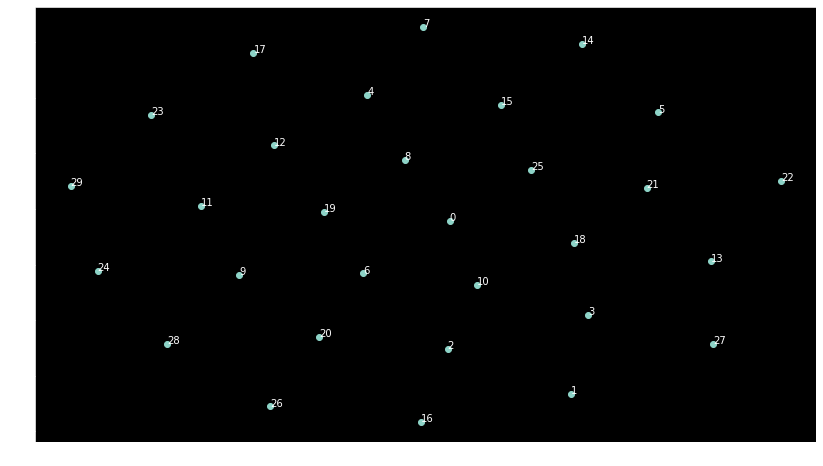

In [ ]:
distri = TSNE(n_components=2)

words = list(descriptions.index)[:30]
vectors = [get_description_embedding_max(descriptions_list[i],embed_glv_300,300) for i in range(30)]
y = distri.fit_transform(vectors)
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()


In [ ]:
for i in range(30):
    print(i, descriptions_list[i])

0 ['softgarden', 'talent', 'acquisition', 'suite', 'inspire', 'hire', 'best', 'candidates', 'faster', 'candidate', 'management', 'employer', 'branding', 'marketing']
1 ['equensworldline', 'financial', 'services', 'company', 'specializes', 'payments', 'transactional', 'services']
2 ['advantech', 'leading', 'brand', 'iot', 'intelligent', 'systems', 'industry', 'machine', 'automation', 'embedding', 'computing', 'embedded', 'systems', 'transportation', 'environment', 'monitoring', 'power', 'automation', 'retail', 'logistics', 'fleet', 'management', 'healthcare', 'medical', 'solu']
3 ['know', 'umbrella', 'organization', 'successfully', 'connects', 'small', 'large', 'tourism', 'organizations', 'tourism', 'enormously', 'important', 'economic', 'factor', 'germany', 'strengthening', 'long', 'term', 'concern', 'german', 'tourism']
4 ['strong', 'business', 'consultants', 'business', 'developers', 'implement', 'turn', 'company', 'leading', 'brand']
5 ['jungheinrich', 'ag', 'german', 'company', 'ac

In [168]:
description_embed = get_all_embedding(descriptions_list, get_description_embedding_max, embed_glv_50, 50 )

  0%|          | 0/47897 [00:00<?, ?it/s]

In [169]:
D = np.array(description_embed)
D.shape

(47897, 50)

In [170]:
#descriptions_list[~np.isnan(D).any(axis=1)]
indexes = [i for i, x in enumerate(~np.isnan(D).any(axis=1)) if x]
desc_list_rm_nan = []
for i in indexes:
    desc_list_rm_nan.append(descriptions_list[i])

In [171]:
D = D[~np.isnan(D).any(axis=1)]
D.shape

(47897, 50)

In [172]:
len(desc_list_rm_nan)

47897

In [173]:
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
neigh.fit(D)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [174]:
D[0]

array([1.20309997, 0.89126998, 1.44599998, 1.04149997, 0.5995    ,
       0.91575998, 0.11657   , 0.74976999, 0.92878997, 1.37909997,
       0.73291999, 1.10249996, 0.34915   , 0.61483002, 0.74457997,
       0.72926003, 1.04040003, 0.90635997, 1.24779999, 0.16209   ,
       1.18110001, 0.68193001, 1.34599996, 0.67265999, 1.51049995,
       0.67553997, 0.36300001, 0.34272   , 1.14859998, 0.85598999,
       3.5150001 , 1.74759996, 0.52702999, 0.52507001, 0.66415   ,
       0.73606998, 0.87339002, 1.12800002, 1.33710003, 0.        ,
       0.58559   , 0.61502999, 0.73839998, 0.97974998, 0.93615001,
       0.78991997, 1.25370002, 1.32620001, 1.29779994, 1.37460005])

In [175]:
# get nearest neighbors
neighs = neigh.kneighbors([D[4]], 7, return_distance=False)



In [176]:
for i in neighs[0]:
    print(desc_list_rm_nan[i])

['strong', 'business', 'consultants', 'business', 'developers', 'implement', 'turn', 'company', 'leading', 'brand']
['deliver', 'expertise', 'salesforce', 'consulting', 'support', 'support', 'integrating', 'salesforce', 'slack', 'company']
['freemind', 'information', 'technology', 'services', 'company', 'focus', 'turn', 'key', 'projects', 'consulting', 'services', 'energy', 'management', 'solutions']
['looking', 'effective', 'business', 'processes', 'integrated', 'concepts', 'right', 'software', 'solutions']
['digital', 'transformation', 'needs', 'business', 'design', 'innovation', 'management', 'consulting', 'implementation']
['management', 'consulting', 'company', 'business', 'transformation', 'business', 'process', 'management', 'solutions']
['isfinancial', 'platform', 'agile', 'software', 'solution', 'credit', 'business', 'digitalisation', 'entire', 'banking', 'sector']


In [ ]:
#neighbors within a radius
nbrs = neigh.radius_neighbors([[0, 0, 1.3]], 0.4, return_distance=False)
np.asarray(nbrs[0][0])

array(2)

In [177]:
kmeans_desc = KMeans(n_clusters=15, random_state=0).fit(D)


In [178]:
examples = give_examples_of_clusters(10, kmeans_desc)

In [181]:
for i in examples[1]:
    print(desc_list_rm_nan[i])

['hirango', 'predictive', 'staffing', ' min', 'lead', 'time', 'identifying', 'staffing', 'needs', 'personnel', 'service', 'providers', 'evaluate', 'right', 'freelancer', 'client', 'advertises', 'vacancy']
['cross', 'industry', 'company', 'personnel', 'consultancy', 'talentschmiede', 'promotes', 'work', 'students', 'graduates', 'young', 'professionals', 'offer', 'customers', 'project', 'teams', 'young', 'talented', 'highly', 'motivated', 'employees']
['ims', 'health', 'quintiles', 'iqvia', 'committed', 'providing', 'solutions', 'enable', 'healthcare', 'companies', 'innovate', 'confidence', 'maximize', 'opportunities', 'ultimately', 'drive', 'healthcare', 'forward', 'via', 'breakthroughs', 'insights']
['executive', 'education', 'developed', 'delivered', 'internal', 'external', 'programs', 'trending', 'topics', 'emerging', 'issues', 'accounting', 'finance', 'industry', 'taught', 'leaders', 'industry', 'specialists', 'highly', 'regarded', 'academics', 'prestigious', 'universities', 'years'

In [222]:
from sklearn.manifold import TSNE
Xtsne = TSNE(n_components=2).fit_transform(D)
dftsne = pd.DataFrame(Xtsne)

/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Visualized on TSNE 2D')

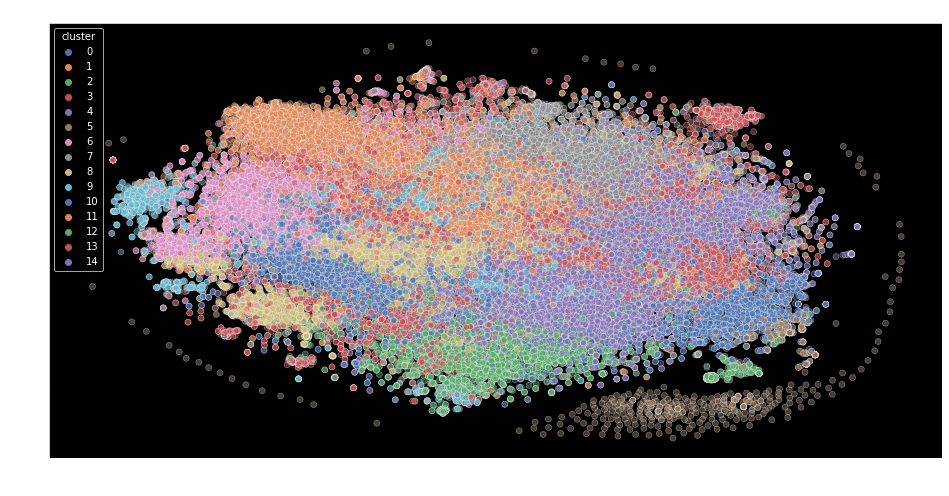

In [223]:
dftsne['cluster'] = kmeans_desc.labels_
dftsne.columns = ['x1','x2','cluster']
fig, ax = plt.subplots(1, figsize=(16,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",  palette="deep",alpha=0.5,ax=ax)
ax.set_title('Visualized on TSNE 2D')

## 5) Tags

### Getting tags

In [8]:
toy_df.head()
def translate_tags(tags_list):
    tags_list = ast.literal_eval(tags_list)
    translated_tags = []
    for tag in tags_list:
        translated_tags.append(translate_to_english(tag))
    return translated_tags

NameError: name 'toy_df' is not defined

In [ ]:
tags_df = toy_df.loc[:,["id", "industries", "keywords"]]

In [ ]:
tags_df = tags_df.dropna(subset=['industries','keywords'])
print(tags_df.shape)

(49632, 3)


### Translation

In [ ]:
eng_tags = tags_df.copy()

In [ ]:
eng_tags.head()

,id,industries,keywords
0,10293,"['Halbleiter', 'marketing', 'information_techn...","['hardware', 'information technology', 'semico..."
1,10294,"['Chemieindustrie', 'Chemikalien', 'Wälzlagerf...","['ceras lubrificantes', 'lubrificantes especia..."
2,10295,"['Management Beratung', 'Management Beratung']","['it interim project management', 'big data am..."
4,10297,"['Seeschiffahrt und maritime Wirtschaft', 'ope...","['maritime', 'maritime]']"
7,10300,"['Computer Software', 'Computer Software']","['enterprise software', 'software', 'informati..."


In [ ]:
eng_tags["industries"] = eng_tags["industries"].apply(lambda row : translate_tags(row))

ConnectError: [Errno 65] No route to host

In [ ]:
industries_list = eng_tags["industries"].values

In [ ]:
print(translate_tags(industries_list[0]))

['Halbleiter', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Personalwirtschaft (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']
['semiconductor', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Human Resources (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']


In [ ]:
industries_list[0]

"['Halbleiter', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Personalwirtschaft (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']"

In [ ]:
translated_industries = []
for ele in tqdm(industries_list):
    try:
        translated_industries.append(translate_tags(ele))
    except:
        translated_industries.append([])

  0%|          | 0/49632 [00:00<?, ?it/s]

In [ ]:
translated_industries[:4]

[['semiconductor',
  'marketing',
  'information_technology',
  'product_management',
  'legal',
  'business_development',
  'Human Resources (HR)',
  'operations',
  'education',
  'support',
  'finance',
  'media_and_commmunication',
  'semiconductors',
  'engineering',
  'sales'],
 ['chemical industry',
  'chemicals',
  'roller bearing greases',
  'high performance lubricants',
  'chain lubricants',
  'roller bearing greases',
  'specialty lubricants',
  'adhesive lubricants',
  'Lubricants for the food industry',
  'adhesive lubricants',
  'chemicals'],
 ['management consulting', 'management consulting'],
 ['Shipping and maritime economy',
  'operations',
  'information_technology',
  'consulting',
  'support',
  'Human Resources (HR)',
  'media_and_commmunication',
  'maritime']]

In [ ]:
count = 0
for ele in translated_industries:
    if (len(ele)==0):
        count+=1
print(count)

1616


In [ ]:
#eng_tags["keywords"] = eng_tags["keywords"].apply(lambda row : translate_tags(row))

In [ ]:
keywords_list = eng_tags["keywords"].values

In [ ]:
keywords_list[:5]

array(["['hardware', 'information technology', 'semiconductor design & manufacturing', 'microcontrollers mcu', 'analog', 'power management', 'adas', 'iot solutions', 'automotive', 'home electronics', 'office automation', 'and information communication technology', 'computer hardware', 'semiconductors', 'semiconductor', 'retail', 'electronics', 'computer hardware]']",
       "['ceras lubrificantes', 'lubrificantes especiais', 'lubrificantes industriais', 'graxas', 'pastas de montagem', 'lubrificantes para mineracao', 'lubrificantes biodegradaveis', 'mineracao', 'oil gas', 'lubrificantes atoxicos', 'oil amp gas', 'speciality lubricants', 'tribological solutions', 'lubrication', 'hydro lubricants', 'pfpe', 'lubricant sprays', 'oils', 'greases', 'pastes', 'nsf h1', 'efficiency', 'lubricant dispenser', 'tribometry', 'lubricating greases', 'lubricating oils', 'lubricants', 'and mosh moah', 'oil', 'gas']",
       "['it interim project management', 'big data amp predictive analytics', 'it stra

In [ ]:
translated_keywords = []
for ele in tqdm(keywords_list):
    try:
        translated_keywords.append(translate_tags(ele))
    except:
        translated_keywords.append([])

  0%|          | 0/49632 [00:00<?, ?it/s]

7
24
30
20
8
24
2 3
401
14001
27000
22000
911
140
6150
304
302 303
4140
305
416
316
1144
1215
8620
420
401
000
8
2
457
00
5
11
401
5
10
7
8
20
172
816
51
71
55
457
401
403
360
24365
100
3 4
000 500
401
2008
2012
508
828
8570
3
401
247365
50
100
9
115
403
401
401
501
802154
911
457
10
3
501
2009
247365
211
00015
000 4116 7116
4212
488510
4731
484122
484110
484220
000
131
1800
8358
403
3
2


In [ ]:
translated_keywords

[['hardware',
  'information technology',
  'semiconductor design & manufacturing',
  'microcontrollers mcu',
  'analog',
  'power management',
  'adas',
  'iot solutions',
  'automotive',
  'home electronics',
  'office automation',
  'and information communication technology',
  'computer hardware',
  'semiconductors',
  'semiconductor',
  'retail',
  'electronics',
  'computer hardware]'],
 ['lubricating waxes',
  'special lubricants',
  'industrial lubricants',
  'fats',
  'assembly folders',
  'mining lubricants',
  'biodegradable lubricants',
  'mineracao',
  'oil gas',
  'non-toxic lubricants',
  'oil amp gas',
  'speciality lubricants',
  'tribological solutions',
  'lubrication',
  'hydro lubricants',
  'pfpe',
  'lubricant sprays',
  'oils',
  'greases',
  'cakes',
  'nsf h1',
  'efficiency',
  'lubricant dispenser',
  'tribometry',
  'lubricating greases',
  'lubricating oils',
  'lubricants',
  'and mosh moah',
  'oil',
  'gas'],
 ['it interim project management',
  'big da

In [ ]:
for i in range(len(translated_industries)):
    #eng_tags["keywords"].iloc[i] = translated_keywords[i]
    eng_tags["industries"].iloc[i] = translated_industries[i]
#eng_tags["keywords"] = eng_tags["keywords"].apply(lambda row : translated_keywords[i])

/var/folders/zj/zyfzmg117675d07g9x8fkjg40000gn/T/ipykernel_41075/3304132830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tags["industries"].iloc[i] = translated_industries[i]


In [ ]:
eng_tags["industries"].iloc[20343]

['Outsourcing / Offshoring']

In [ ]:
translated_industries[20343]

['Outsourcing / Offshoring']

In [ ]:
eng_tags.to_csv("eng_tags.csv")

### Exploration

In [7]:
eng_tags = pd.read_csv("eng_tags.csv")

In [8]:
eng_tags

,Unnamed: 0,id,industries,keywords
0,0,10293,"['semiconductor', 'marketing', 'information_te...","['hardware', 'information technology', 'semico..."
1,1,10294,"['chemical industry', 'chemicals', 'roller bea...","['lubricating waxes', 'special lubricants', 'i..."
2,2,10295,"['management consulting', 'management consulti...","['it interim project management', 'big data am..."
3,4,10297,"['Shipping and maritime economy', 'operations'...","['maritime', 'maritime]']"
4,7,10300,"['Computer Software', 'Computer Software']","['enterprise software', 'software', 'informati..."
...,...,...,...,...
49627,49995,268689,"['education management', 'sales', 'business_de...","['education management', 'education management]']"
49628,49996,268690,"['biotechnology', 'engineering', 'arts_and_des...","['programming', 'engineering biology', 'inform..."
49629,49997,268691,"['banking', 'support', 'Human Resources (HR)',...","['full service banking', 'finance', 'banking']"
49630,49998,268692,"['Human Resources (HR)', 'sales', 'consulting'...","['programme management', 'retail commerce', 'd..."


In [9]:
industries_list = eng_tags['industries'].values
keywords_list = eng_tags['keywords'].values


In [10]:
industries_list[0]

"['semiconductor', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Human Resources (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']"

In [ ]:
ast.literal_eval(industries_list[0])

['semiconductor',
 'marketing',
 'information_technology',
 'product_management',
 'legal',
 'business_development',
 'Human Resources (HR)',
 'operations',
 'education',
 'support',
 'finance',
 'media_and_commmunication',
 'semiconductors',
 'engineering',
 'sales']

In [ ]:
industries_list[0]

"['semiconductor', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Human Resources (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']"

In [11]:
industries_list[0]
list_of_industries_tags = []
list_of_keywords_tags = []
for ele in industries_list:
    list_of_industries_tags += ast.literal_eval(ele)

for ele in keywords_list:
    list_of_keywords_tags += ast.literal_eval(ele)

In [12]:
print(ast.literal_eval(industries_list[0])[0])

semiconductor


In [13]:
list_of_industries_tags

['semiconductor',
 'marketing',
 'information_technology',
 'product_management',
 'legal',
 'business_development',
 'Human Resources (HR)',
 'operations',
 'education',
 'support',
 'finance',
 'media_and_commmunication',
 'semiconductors',
 'engineering',
 'sales',
 'chemical industry',
 'chemicals',
 'roller bearing greases',
 'high performance lubricants',
 'chain lubricants',
 'roller bearing greases',
 'specialty lubricants',
 'adhesive lubricants',
 'Lubricants for the food industry',
 'adhesive lubricants',
 'chemicals',
 'management consulting',
 'management consulting',
 'Shipping and maritime economy',
 'operations',
 'information_technology',
 'consulting',
 'support',
 'Human Resources (HR)',
 'media_and_commmunication',
 'maritime',
 'Computer Software',
 'Computer Software',
 'Computer Software',
 'Payroll',
 'Client-Server-Software',
 'consulting',
 'Controlling',
 'Customer Relationship Management (CRM)',
 'development of software',
 'IT-Outsourcing',
 'IT Projects',


In [14]:
counter_industry = Counter(list_of_industries_tags)
counter_keywords = Counter(list_of_keywords_tags)

In [15]:
print(len(counter_keywords))

130571


In [16]:
print(len(counter_industry))

1911


In [17]:
counter_industry.most_common()[:300]

[('engineering', 19098),
 ('sales', 18511),
 ('marketing', 17726),
 ('Human Resources (HR)', 16072),
 ('information_technology', 15777),
 ('business_development', 15643),
 ('finance', 15483),
 ('operations', 15419),
 ('support', 12710),
 ('accounting', 11430),
 ('consulting', 11331),
 ('media_and_commmunication', 9461),
 ('arts_and_design', 8363),
 ('education', 6246),
 ('Informationstechnologie', 6032),
 ('Computer Software', 5750),
 ('administrative', 5030),
 ('legal', 4013),
 ('entrepreneurship', 3926),
 ('marketing and advertisement', 3634),
 ('product_management', 3607),
 ('hospital and healthcare', 3337),
 ('real estate industry', 2671),
 ('financial services', 2576),
 ('Charities (Non-Profit)', 2282),
 ('education management', 2054),
 ('data_science', 1880),
 ('legal advice', 1718),
 ('management consulting', 1671),
 ('insurance', 1523),
 ('Building and Construction', 1499),
 ('telecommunications', 1426),
 ('construction', 1384),
 ('higher education', 1304),
 ('oil and energy', 

In [18]:
counter_keywords.most_common()[:900]

[('information technology & services', 10682),
 ('computer software', 4170),
 ('enterprise software', 4055),
 ('internet', 3960),
 ('consumers', 3749),
 ('finance', 3698),
 ('marketing & advertising', 3122),
 ('hospital & health care', 3013),
 ('enterprises', 2226),
 ('consumer internet', 2096),
 ('health', 1986),
 ('wellness & fitness', 1897),
 ('real estate', 1886),
 ('construction', 1803),
 ('marketing', 1754),
 ('non-profits & non-profit services', 1716),
 ('leisure', 1581),
 ('travel & tourism', 1573),
 ('education', 1469),
 ('software', 1407),
 ('consumer goods', 1381),
 ('education management', 1341),
 ('retail', 1311),
 ('health care', 1244),
 ('e-commerce', 1240),
 ('legal services', 1223),
 ('automotive', 1179),
 ('media', 1125),
 ('information technology & services]', 1100),
 ('b2b', 1098),
 ('insurance', 1092),
 ('telecommunications', 1075),
 ('consulting', 1062),
 ('advertising', 1056),
 ('environmental services & clean energy', 1046),
 ('hospitality', 1041),
 ('financial 

(array([  942.,     0.,     0.,   313.,     0.,     0.,     0., 23254.,
            0.,     0.,     0.,  1245.,     0.,     0., 29348.,     0.,
            0.,     0.,  3598.,     0.,     0.,     0., 29670.,     0.,
            0., 39880.,     0.,     0.,     0., 20625.,     0.,     0.,
            0.,  5598.,     0.,     0.,     0.,  2170.,     0.,     0.,
         8345.,     0.,     0.,     0., 11357.,     0.,     0.,     0.,
         6073.,     0.,     0.,  8514.,     0.,     0.,     0.,  8639.,
            0.,     0.,     0.,   557.,     0.,     0., 38801.,     0.,
            0.,     0.,  2432.,     0.,     0.,     0., 19779.,     0.,
            0.,     0.,  9881.,     0.,     0., 10026.,     0.,     0.,
            0.,  2588.,     0.,     0.,     0.,   828.,     0.,     0.,
         4627.,     0.,     0.,     0.,  1364.,     0.,     0.,     0.,
         1146.,     0.,     0.,  9724.]),
 array([ 3.  ,  3.27,  3.54,  3.81,  4.08,  4.35,  4.62,  4.89,  5.16,
         5.43,  5.7 ,  

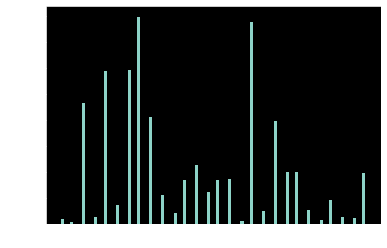

In [19]:
arr_hist = np.zeros(len(list_of_industries_tags))
for i, e in enumerate(list_of_industries_tags):
    if (len(e)<30):
        arr_hist[i] = int(len(e))
    else:
        arr_hist[i] = 30
plt.hist(arr_hist,bins=100,)

In [ ]:
arr_hist

array([13.,  9., 22., ..., 15.,  9., 11.])

### Tokenizing, lowercase etc.

In [9]:
def processing_tags(list_of_tags):
    tokenized_tags = []
    for e in list_of_tags:
        processed_tags = processing_text(e,stop_words)
        #print(processed_tags)
        for ele in processed_tags:
            tokenized_tags.append(ele)
    return tokenized_tags

In [35]:
industries_list[2435]

"['legal advice', 'accounting', 'legal', 'legal advice']"

In [29]:
processing_tags(industries_list[4378])

[]

In [36]:
industries_list[0]

"['semiconductor', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Human Resources (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']"

In [37]:
industries_list[0]

"['semiconductor', 'marketing', 'information_technology', 'product_management', 'legal', 'business_development', 'Human Resources (HR)', 'operations', 'education', 'support', 'finance', 'media_and_commmunication', 'semiconductors', 'engineering', 'sales']"

In [10]:
def processing_list_of_tags(list_of_tags):
    processed_tags = []
    for e in tqdm(list_of_tags):
        processed_tags.append(processing_tags(ast.literal_eval(e)))
    return processed_tags

In [11]:
processed_industry_tags = processing_list_of_tags(industries_list)
processed_keywords_tags = processing_list_of_tags(keywords_list)

NameError: name 'industries_list' is not defined

In [ ]:
print(processed_keywords_tags[:3])

[['hardware', 'information', 'technology', 'semiconductor', 'design', 'manufacturing', 'microcontrollers', 'mcu', 'analog', 'power', 'management', 'adas', 'iot', 'solutions', 'automotive', 'home', 'electronics', 'office', 'automation', 'information', 'communication', 'technology', 'computer', 'hardware', 'semiconductors', 'semiconductor', 'retail', 'electronics', 'computer', 'hardware'], ['lubricating', 'waxes', 'special', 'lubricants', 'industrial', 'lubricants', 'fats', 'assembly', 'folders', 'mining', 'lubricants', 'biodegradable', 'lubricants', 'mineracao', 'oil', 'gas', 'non', 'toxic', 'lubricants', 'oil', 'amp', 'gas', 'speciality', 'lubricants', 'tribological', 'solutions', 'lubrication', 'hydro', 'lubricants', 'pfpe', 'lubricant', 'sprays', 'oils', 'greases', 'cakes', 'efficiency', 'lubricant', 'dispenser', 'tribometry', 'lubricating', 'greases', 'lubricating', 'oils', 'lubricants', 'mosh', 'moah', 'oil', 'gas'], ['interim', 'project', 'management', 'big', 'data', 'amp', 'predi

In [ ]:
list_of_all_words_in_keywords_tags = []
for ele in processed_keywords_tags:
    for ele2 in ele:
        list_of_all_words_in_keywords_tags.append(ele2)

In [ ]:
counter_all_words_in_keywords_tags = Counter(list_of_all_words_in_keywords_tags)

In [ ]:
print(list(counter_all_words_in_keywords_tags.keys())[0])

hardware


In [ ]:
def get_stats_about_embedding():
    pass

In [ ]:
l = 0
k = 0
tmp_list = []
for j in list(counter_all_words_in_keywords_tags.keys()):
    try:
        word2_vec_vectors[j]
        k += 1
    except:
        l += 1
        tmp_list.append(counter_all_words_in_keywords_tags[j])
        print(counter_all_words_in_keywords_tags[j])
print(l, k)

5
1
25
1
1
1
2
6
3
2
1
1
57
1
1
32
50
2
10
10
1
117
1
2
1
5
1
59
25
1
1
1
98
2
2
2
45
1
1
1
1
1
1
1
3
1
7
2
1
1
3
2
26
13
2
1
1
1
1
24
1
1
2
4
1
6
1
4
10
4
2
1
1
1
1
1
1
1
1
3
34
1
1
1
2
1
4
1
2
2
1
1
1
1
2
1
25
3
2
16
1
2
1
1
1
1
1
4
1
2
2
1
1
11
1
1
3
1
1
1
1
5
1
1
4
1
1
1
2
79
1
1
1
1
7
1
1
1
1
5
1
1
30
3
6
2
10
1
1
4
2
2
1
1
1
2
73
1
39
4
10
1
1
7
2
2
1
5
1
1
7
5
1
1
1
1
1
2
1
1
9
1
2
3
1
1
2
1
1
1
1
1
1
77
54
3
1
1
1
1
76
112
1
2
1
1
1
2
1
1
1
1
8
1
1
5
1
1
1
1
1
2
2
1
1
1
1
1
1
18
1
3
4
1
1
1
1
1
1
1
1
1
1
36
3
6
1
1
1
3
3
4
1
2
2
1
2
60
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
6
1
24
1
1
1
1
1
2
2
1
1
4
1
1
5
1
1
1
1
1
8
2
1
2
4
1
25
7
1
1
6
15
81
2
1
1
11
6
1
1
1
1
1
1
3
1
1
1
1
1
1
2
29
10
1
1
1
1
11
2
17
1
1
1
1
2
1
1
4
1
1
4
43
1
1
1
1
1
1
1
1
1
1
1
10
15
1
1
1
1
1
4
8
1
3
1
1
1
2
1
1
1
1
2
1
8
1
1
1
1
2
11
3
1
1
1
2
26
1
1
5
1
2
1
1
1
1
1
1
1
3
2
1
1
1
1
1
5
2
1
3
1
1
5
1
8
1
1
1
1
1
1
1
35
1
1
8
47
16
1
1
1
2
1
1
1
1
1
5
3
2
1
5
1
1
10
4
7
1
1
1
3
1
15
1
1
1
1
1
2
1
2
1
1
1
2
1
1
7
1

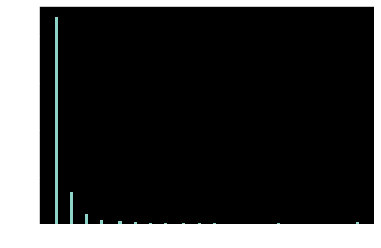

In [ ]:
tmp_list = [tmp_list[i] if tmp_list[i]<20 else 20 for i in range(len(tmp_list))]
tmp_arr = np.array(tmp_list)
plt.hist(tmp_arr, bins=100)
plt.show()

In [ ]:
tags_processed = df = pd.DataFrame(list(zip(processed_industry_tags, processed_keywords_tags)), columns =['industry', 'keywords'])

In [ ]:
tags_processed.to_csv("tags_processed.csv")

In [11]:
tags_processed = pd.read_csv("tags_processed.csv")

In [12]:
tags_processed

,Unnamed: 0,industry,keywords
0,0,"['semiconductor', 'marketing', 'information te...","['hardware', 'information', 'technology', 'sem..."
1,1,"['chemical', 'industry', 'chemicals', 'roller'...","['lubricating', 'waxes', 'special', 'lubricant..."
2,2,"['management', 'consulting', 'management', 'co...","['interim', 'project', 'management', 'big', 'd..."
3,3,"['shipping', 'maritime', 'economy', 'operation...","['maritime', 'maritime']"
4,4,"['computer', 'software', 'computer', 'software']","['enterprise', 'software', 'software', 'inform..."
...,...,...,...
49627,49627,"['education', 'management', 'sales', 'business...","['education', 'management', 'education', 'mana..."
49628,49628,"['biotechnology', 'engineering', 'arts and des...","['programming', 'engineering', 'biology', 'inf..."
49629,49629,"['banking', 'support', 'human', 'resources', '...","['full', 'service', 'banking', 'finance', 'ban..."
49630,49630,"['human', 'resources', 'sales', 'consulting', ...","['programme', 'management', 'retail', 'commerc..."


In [13]:
processed_industry_tags = tags_processed["industry"].values
processed_keywords_tags = tags_processed["keywords"].values

In [14]:
len(processed_keywords_tags[0])

388

In [15]:
list_of_industries_tags = []
list_of_keywords_tags = []
for ele in processed_industry_tags:
    list_of_industries_tags.append(ast.literal_eval(ele))

for ele in processed_keywords_tags:
    list_of_keywords_tags.append(ast.literal_eval(ele))


In [16]:
processed_industry_tags = list_of_industries_tags
processed_keywords_tags = list_of_keywords_tags

In [17]:
processed_tags = []
for i in range(len(processed_industry_tags)):
    processed_tags.append(processed_industry_tags[i]+processed_keywords_tags[i])

In [19]:
len(processed_tags[0])

46

### Tfidf

In [18]:
def get_corpus_counts(descriptions_list):
    l = []
    for desc in descriptions_list:
        l += desc
    return Counter(l)

def get_multiple_appearence_words(dict):
    corpus = []
    for i, (key,value) in enumerate(dict.items()):
        if (value>1):
            corpus.append(key)
    return corpus

def get_number_of_occ(word, description):
    i=0
    for ele in description:
        if (ele == word):
            i+=1
    return i

def get_bag_of_word_matrix(descriptions_list, corpus):
    n = len(descriptions_list)
    m = len(corpus)
    mat = np.zeros((n,m))
    for i in tqdm(range(n)):
        for j in range(m):
            mat[i,j]=get_number_of_occ(corpus[j], descriptions_list[i])
    return mat

In [53]:
tags_bow = get_bag_of_word_matrix(processed_tags,get_multiple_appearence_words(get_corpus_counts(processed_tags)))

  0%|          | 0/49632 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [49]:
tags_bow.shape

(49632, 15746)

In [50]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(tags_bow)
tf_idf_vector=tfidf_transformer.transform(tags_bow)

In [73]:
#cosine_sim = linear_kernel(tf_idf_vector, tf_idf_vector)
cosine_sim = linear_kernel(X, X)

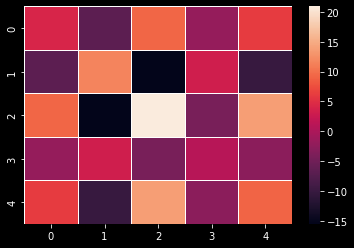

In [75]:
ax = sns.heatmap(cosine_sim[:5,:5], linewidth=0.5)
plt.show()

In [39]:
tf_idf_vector

<49632x1331 sparse matrix of type '<class 'numpy.float64'>'
	with 337420 stored elements in Compressed Sparse Row format>

### Embedding

Using only most common tags
Combining embedding and tfidf

In [25]:
tags_embed = get_all_embedding(processed_tags, get_description_embedding_avg, embed_glv_50, 50 )

  0%|          | 0/49632 [00:00<?, ?it/s]

In [31]:
corpus_tags = get_multiple_appearence_words(get_corpus_counts(processed_tags))

In [34]:
corpus_tags = [[i] for i in corpus_tags]

In [36]:
corpus_embed = get_all_embedding(corpus_tags, get_description_embedding_avg, embed_glv_50, 50 )

  0%|          | 0/15746 [00:00<?, ?it/s]

### Clustering and dimensionality reduction

#### PCA

In [52]:
x = tf_idf_vector.toarray()

In [53]:
x = StandardScaler().fit_transform(x)


In [69]:

pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

In [70]:

principalComponents = pca.transform(x)

#### Clustering & Nearest neighbours

In [37]:
def find_indices(list_to_check, item_to_find):
    array = np.array(list_to_check)
    indices = np.where(array == item_to_find)[0]
    return list(indices)

def give_examples_of_clusters(num, kmeans):
    examples = []
    labels = np.unique(kmeans.labels_)
    for i in labels:
        examples.append(np.random.choice(find_indices(kmeans.labels_,i), size=num))
    return examples

##### ------------ For tags

In [54]:
Y = np.array(corpus_embed)
kmeans = KMeans(n_clusters=20, random_state=0).fit(Y)

In [65]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering


connectivity = kneighbors_graph(Y, n_neighbors=10, include_self=False)

ward = AgglomerativeClustering(n_clusters=30, connectivity=connectivity, linkage="ward").fit(Y)

In [66]:
examples = give_examples_of_clusters(20, ward)

In [71]:
for i in examples[5]:
    print(corpus_tags[i])

['rehab']
['specializes']
['billionaires']
['oncologist']
['technologist']
['companionship']
['gmat']
['firefighting']
['actuarial']
['bootcamp']
['neurologist']
['bachelors']
['contractor']
['postgraduate']
['employing']
['vce']
['workouts']
['preparatory']
['educators']
['workout']


##### ---------- For companies

In [71]:
principalComponents.shape

(49632, 3)

In [72]:
X = principalComponents

In [64]:
Y = np.array(tags_embed)

array([[-1.24608049e-01, -1.24532484e-01,  2.02800474e+00, ...,
         1.06840100e+00,  9.79317596e-01, -8.91926819e-01],
       [ 7.67103678e-02,  7.23695645e-01, -3.22314457e+00, ...,
         2.41647881e+00, -4.02111346e-01, -1.86941655e-01],
       [-2.76795927e-01, -4.40401163e-01,  4.60230714e+00, ...,
         8.64288777e-02, -1.33891663e+00, -2.69274975e-01],
       ...,
       [-8.17935610e-03,  2.26609931e-02, -7.95869965e-01, ...,
        -8.83046890e-02, -8.92785678e-02, -1.33337565e-01],
       [-5.95100389e-01, -1.09568096e+00,  1.27043457e+01, ...,
        -1.66072417e+00, -6.13364534e-01, -2.93551246e+00],
       [-1.49446493e-01, -2.65083274e-01,  2.23695339e+00, ...,
         6.80854580e-01, -9.29840633e-01,  2.21319546e-01]])

In [162]:
kmeans = KMeans(n_clusters=40, random_state=0).fit(Y)


In [26]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering


connectivity = kneighbors_graph(Y, n_neighbors=10, include_self=False)

ward = AgglomerativeClustering(n_clusters=30, connectivity=connectivity, linkage="ward").fit(Y)

/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 5 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [27]:
Counter(kmeans.labels_)

Counter({36: 2508,
         27: 1899,
         21: 3938,
         37: 1241,
         2: 2033,
         15: 2176,
         9: 429,
         16: 1270,
         1: 1209,
         3: 981,
         19: 1406,
         24: 1314,
         34: 381,
         39: 2378,
         14: 2659,
         29: 556,
         4: 1048,
         28: 1488,
         10: 1364,
         18: 1200,
         12: 421,
         32: 1653,
         8: 1351,
         5: 1089,
         25: 2093,
         38: 837,
         11: 1319,
         13: 1382,
         17: 486,
         31: 1239,
         35: 270,
         33: 253,
         22: 746,
         23: 641,
         26: 1113,
         7: 566,
         6: 622,
         0: 1178,
         20: 354,
         30: 541})

In [ ]:
kmeans.predict([[0, 0], [12, 3]])


In [29]:
kmeans.labels_



In [52]:
examples = give_examples_of_clusters(10, kmeans)

In [70]:
for i in examples[14]:
    print(processed_tags[i])

['video', 'games', 'engineering', 'arts and design', 'legal', 'business development', 'marketing', 'entrepreneurship', 'games', 'publishing', 'transmedia', 'platform', 'service', 'effortlessly', 'awesome', 'connected', 'smart', 'toys', 'computer', 'software', 'internet', 'things', 'platform', 'games', 'development', 'research', 'development', 'augmented', 'reality', 'games', 'service', 'computer', 'games', 'online', 'games', 'consumer', 'software', 'video', 'games', 'information', 'technology', 'services', 'consumers']
['online', 'media', 'marketing', 'media and commmunication', 'online', 'media', 'native', 'advertising', 'brand', 'journalism', 'international', 'crisis', 'coverage', 'content', 'marketing', 'digital', 'content', 'content', 'production', 'content', 'strategy', 'amplification', 'brand', 'journalism', 'search', 'engine', 'optimisation', 'international', 'crisis', 'coverage', 'editorial', 'news', 'native', 'advertising', 'digital', 'content', 'content', 'strategy', 'amplifi

In [147]:
centers_kmeans = kmeans.cluster_centers_

In [148]:
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
#neigh.fit(X)
neigh.fit(centers_kmeans)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [149]:
# get nearest neighbors
neighbours = neigh.kneighbors([centers_kmeans[26]], 5, return_distance=False)
print(neighbours[0].dtype)

int64


In [150]:
neighbours

array([[26, 11,  1, 13, 28]])

In [151]:
from sklearn.manifold import TSNE
Xtsne = TSNE(n_components=2).fit_transform(Y)
dftsne = pd.DataFrame(Xtsne)

/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahmedewva/opt/anaconda3/envs/idp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Visualized on TSNE 2D')

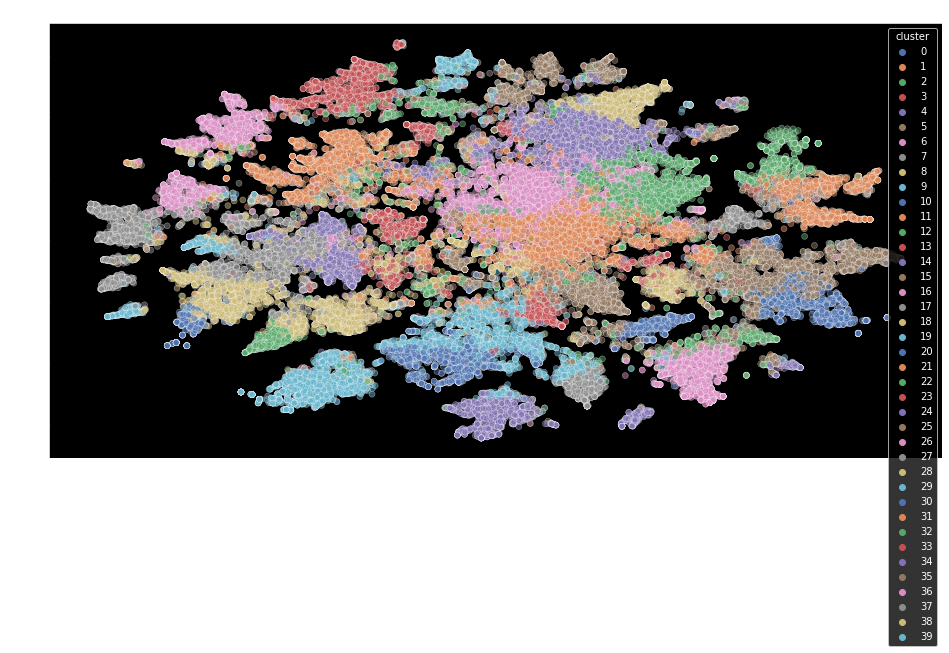

In [155]:
dftsne['cluster'] = kmeans.labels_
dftsne.columns = ['x1','x2','cluster']
fig, ax = plt.subplots(1, figsize=(16,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",  palette="deep",alpha=0.5,ax=ax)
ax.set_title('Visualized on TSNE 2D')
#fig.suptitle('Visualization using TSNE2D')
#display(fig)

"fig.suptitle('Visualization using TSNE2D')\ndisplay(fig)"

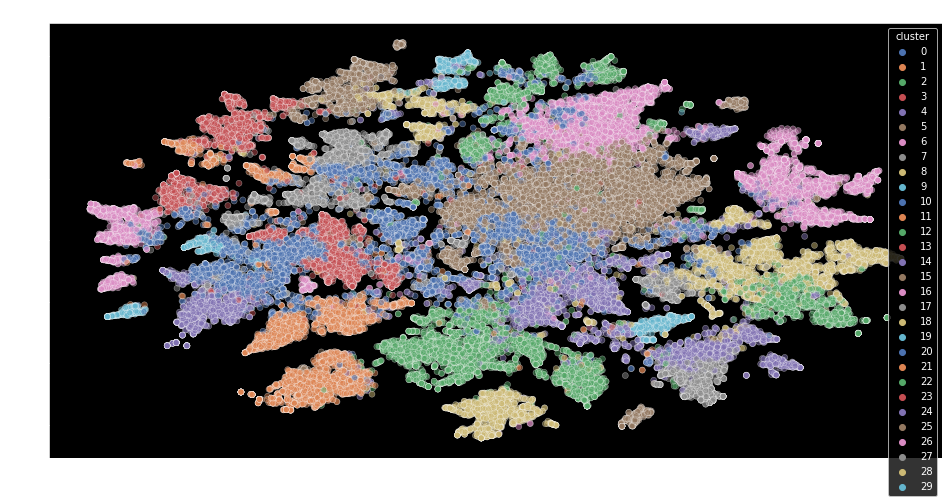

In [156]:
dftsne['cluster'] = ward.labels_
dftsne.columns = ['x1','x2','cluster']
fig, ax = plt.subplots(1, figsize=(16,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",  palette="deep",alpha=0.5,ax=ax)
ax.set_title('Visualized on TSNE 2D')
"""fig.suptitle('Visualization using TSNE2D')
display(fig)"""

In [133]:
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
#neigh.fit(X)
neigh.fit(Y)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [153]:
# get nearest neighbors
neighbours = neigh.kneighbors([Y[9]], 10, return_distance=False)
print(neighbours[0].dtype)

int64


In [154]:
print(processed_tags[9])

['clothing', 'fashion', 'leather', 'goods', 'accessories', 'belts']


In [155]:
for i in neighbours[0]:
    print(processed_tags[i])

['clothing', 'fashion', 'leather', 'goods', 'accessories', 'belts']
['clothing', 'fashion', 'marketing', 'media and commmunication', 'clothing', 'fashion', 'shoes', 'apparel', 'fashion', 'accessories', 'leather', 'goods']
['leather', 'accessories', 'leather', 'belts', 'apparel', 'fashion', 'iphone', 'cases']
['clothing', 'fashion', 'sales', 'retail', 'apparel', 'fashion', 'shoes', 'belts', 'bags']
['clothing', 'fashion', 'sales', 'clothing', 'fashion', 'fur', 'garments', 'accessories', 'home', 'decor', 'furniture', 'apparel', 'fashion']
['clothing', 'fashion', 'human', 'resources', 'arts and design', 'finance', 'information technology', 'support', 'clothing', 'fashion', 'leather', 'handbags', 'leather', 'wallets', 'nylon', 'bags', 'pu', 'bags', 'purses', 'wallets', 'canvas', 'bags', 'cotton', 'bags', 'leather', 'trim', 'leather', 'handbags', 'leather', 'wallets', 'small', 'leather', 'goods', 'nylon', 'bags', 'pu', 'bags', 'purses', 'wallets', 'leather', 'goods', 'canvas', 'bags', 'cott

In [ ]:
nbrs = neigh.radius_neighbors([[0, 0, 1.3]], 0.4, return_distance=False)
np.asarray(nbrs[0][0])

## 6) Geo data processing

In [88]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

In [89]:
geolocator = Nominatim(user_agent = 'test')
address = "66 Max-Keith-Straße, 45136, Essen, Nordrhein-Westfalen, Germany"#"66 Max-Keith-Straße, 45136, Essen, Nordrhein-Westfalen, Germany"
location = geolocator.geocode(address)
point = location.point

In [90]:
print(location.point)
print(location.address)


print("Latitude:", point.latitude)
print("Longitude:", point.longitude)

51 25m 56.1997s N, 7 1m 32.6762s E
Tapbar, 66, Max-Keith-Straße, Bergerhausen, Stadtbezirk II, Essen, Nordrhein-Westfalen, 45136, Deutschland
Latitude: 51.4322777
Longitude: 7.0257434


In [94]:
location = geolocator.reverse(str(point.latitude)+","+str(point.longitude))
location.raw['address']

{'office': 'Tapbar',
 'house_number': '66',
 'road': 'Max-Keith-Straße',
 'suburb': 'Bergerhausen',
 'city_district': 'Stadtbezirk II',
 'city': 'Essen',
 'state': 'Nordrhein-Westfalen',
 'ISO3166-2-lvl4': 'DE-NW',
 'postcode': '45136',
 'country': 'Deutschland',
 'country_code': 'de'}

In [15]:
import requests

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')

resp_json_payload = response.json()

print(resp_json_payload)#['results'][0]['geometry']['location'])

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [17]:
import requests
import urllib.parse

address = 'Speer und rogal gmbh'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

IndexError: list index out of range

In [ ]:

companies_df[['Latitude', 'Longitude']] = companies_df.apply(lambda x: my_geocoder(x['address']), axis=1)

print("{}% of addresses were geocoded!".format((1 - sum(np.isnan(companies_df["Latitude"])) / len(companies_df)) * 100))

# Drop companies_df that were not successfully geocoded
companies_df_geocoded = companies_df.loc[~np.isnan(companies_df["Latitude"])]
companies_df_geocoded = gpd.GeoDataFrame( companies_df_geocoded, geometry=gpd.points_from_xy(companies_df_geocoded.Longitude, companies_df_geocoded.Latitude))
companies_df_geocoded.crs = {'init': 'epsg:4326'}
companies_df_geocoded.head()

In [ ]:
m = folium.Map(location=[54, 15], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in companies_df.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['name']).add_to(m)

In [ ]:
def get_geo(address):
    geolocator = Nominatim(user_agent = 'test')
    location = geolocator.geocode(address)
    point = location.point
    """print(location.point)
    print(location.address)


    print("Latitude:", point.latitude)
    print("Longitude:", point.longitude)"""
    str1 = f'{str(location.address)}'
    str2 = f'{str(point.latitude)}'
    str3 = f'{str(point.longitude)}'
    result = '{ "full address":' + '"'+location.address+'"'+ ', "latitude":' +str2 +', "longitude":' +str3+'}'
    print(result)
    result = json.loads(result)
    print(result)
    return "hey"#[]

In [ ]:
get_geo("bmw headquarters")

{ "full address":"BMW-Vierzylinder, Dostlerstraße, Am Riesenfeld, Milbertshofen-Am Hart, München, Bayern, 80809, Deutschland", "latitude":48.176911849999996, "longitude":11.560126843447891}
{'full address': 'BMW-Vierzylinder, Dostlerstraße, Am Riesenfeld, Milbertshofen-Am Hart, München, Bayern, 80809, Deutschland', 'latitude': 48.176911849999996, 'longitude': 11.560126843447891}


'hey'

In [ ]:
address = "bmw headquarters"
url = 'http://127.0.0.1:5000/get_geo/'+address

In [ ]:
response = requests.get(url)
js = response.json()
print(js['full address'])

BMW-Vierzylinder, Dostlerstraße, Am Riesenfeld, Milbertshofen-Am Hart, München, Bayern, 80809, Deutschland


## 7) Exploring other attributes

In [94]:
toy_df.head()

,id,name,description,number_of_employees,seo_description,annual_revenue_estimation,revenue_currency,address,founding_year,languages_spoken_at_company,headquarter_location_geo_code_json,geo_lon,geo_lat
0,1106,softgarden,With the softgarden's Talent Acquisition Suite...,200,Mit der Talent Acquisition Suite von softgarde...,50000000,NaN,"Tauentzienstrae, 66113, Berlin, Berlin, Germany",2003,NaN,NaN,NaN,NaN
1,1107,equensWorldline,EquensWorldline is a financial services compan...,10000,equensWorldline is the pan-European leader in ...,1000000000,NaN,"1 Place des Degrés, 92800, Puteaux, Île-de-Fra...",1974,NaN,NaN,5.1085,52.061645
2,1108,"Advantech Co., Ltd.",Advantech is a leading brand in IoT intelligen...,5000,Industrial Display Systems provide a wide rang...,100000000,NaN,"4445 Lake Forest Drive, 95035, United States",1983,NaN,NaN,NaN,NaN
3,1109,Deutscher Tourismusverband,"Wissen Sie, welcher Dachverband kleine und gro...",25,DTV – Stimme der deutschen Tourismusregionen –...,386000,NaN,"9 Schillstraße, 94066, Berlin, Berlin, Germany",1902,NaN,NaN,NaN,NaN
4,1110,Institute of Brand Logic,Die starken Unternehmensberater und Unternehme...,50,INSTITUTE OF BRAND LOGIC – die Strategieboutiq...,NaN,NaN,"17 Ing.-Etzel-Straße, 6020, Innsbruck, Tirol, ...",1999,NaN,NaN,NaN,NaN


In [131]:
size_df = df_full[['id','number_of_employees','annual_revenue_estimation']].dropna(subset=['number_of_employees','annual_revenue_estimation'])

In [24]:
def range_to_value(range_):
    if range_=='1-10' or range_=='1-9':
        return '10'
    elif range_=='11-50' or range_=='10-49':
        return '30'
    elif range_=='11-100':
        return '50'
    elif range_=='201-500' or range_=='200+' or range_=='101-500':
        return '350'
    elif range_=='51-200' or range_=='50-199':
        return '150'
    else:
        return range_

In [25]:
exceptions = []
for i in size_df["number_of_employees"].values:
    try:
        float(range_to_value(i))
    except:
        exceptions.append(i)

In [26]:
exceptions

[]

In [20]:
size_df["number_of_employees"].values[10290]

'500'

In [10]:
size_df.tail()

,number_of_employees,annual_revenue_estimation
2845922,10,1000000.0
2845929,10,1000000.0
2845946,10,10000000.0
2845971,50,1000000.0
2845992,10,1000000.0


In [27]:
employees = []
for i in size_df["number_of_employees"].values:
    try:
        employees.append(float(range_to_value(i)))
    except:
        print(i)

In [209]:
#print(employees)

In [28]:
size_df["annual_revenue_estimation"]
revenues = []
for i in size_df["annual_revenue_estimation"].values:
    try:
        revenues.append(float(range_to_value(i)))
    except:
        revenues.append(0)
        print(i)

In [29]:
revenues

[1000000000.0,
 10000000.0,
 2000000.0,
 10000000.0,
 50000000.0,
 295000000.0,
 10000000.0,
 20000000.0,
 2000000.0,
 50000000.0,
 30000000.0,
 10000000.0,
 1000000.0,
 1000000000.0,
 1000000.0,
 10000000.0,
 10000000.0,
 50000000.0,
 2000000.0,
 50000000.0,
 1000000000.0,
 1000000000.0,
 10000000.0,
 10000000.0,
 48154000.0,
 100000000.0,
 10000000.0,
 1000000.0,
 9200000.0,
 50000000.0,
 10000000.0,
 10000000.0,
 521180000.0,
 800654000.0,
 1000000000.0,
 50000000.0,
 250000000.0,
 1000000000.0,
 30000000.0,
 10000000.0,
 50000000.0,
 10000000.0,
 10000000.0,
 50000000.0,
 1500000000.0,
 50000000.0,
 100000000.0,
 1000000.0,
 50000000.0,
 1000000.0,
 1000000000.0,
 30000000.0,
 100000000.0,
 10000000.0,
 10000000.0,
 30000000.0,
 1000000000.0,
 50000000.0,
 6182892.0,
 10000000.0,
 500000000.0,
 100000000.0,
 50000000.0,
 250000000.0,
 30000000.0,
 1000000.0,
 10000000.0,
 50000000.0,
 10000000.0,
 1000000.0,
 50000000.0,
 1000000000.0,
 10000000.0,
 250000000.0,
 250000000.0,
 1000

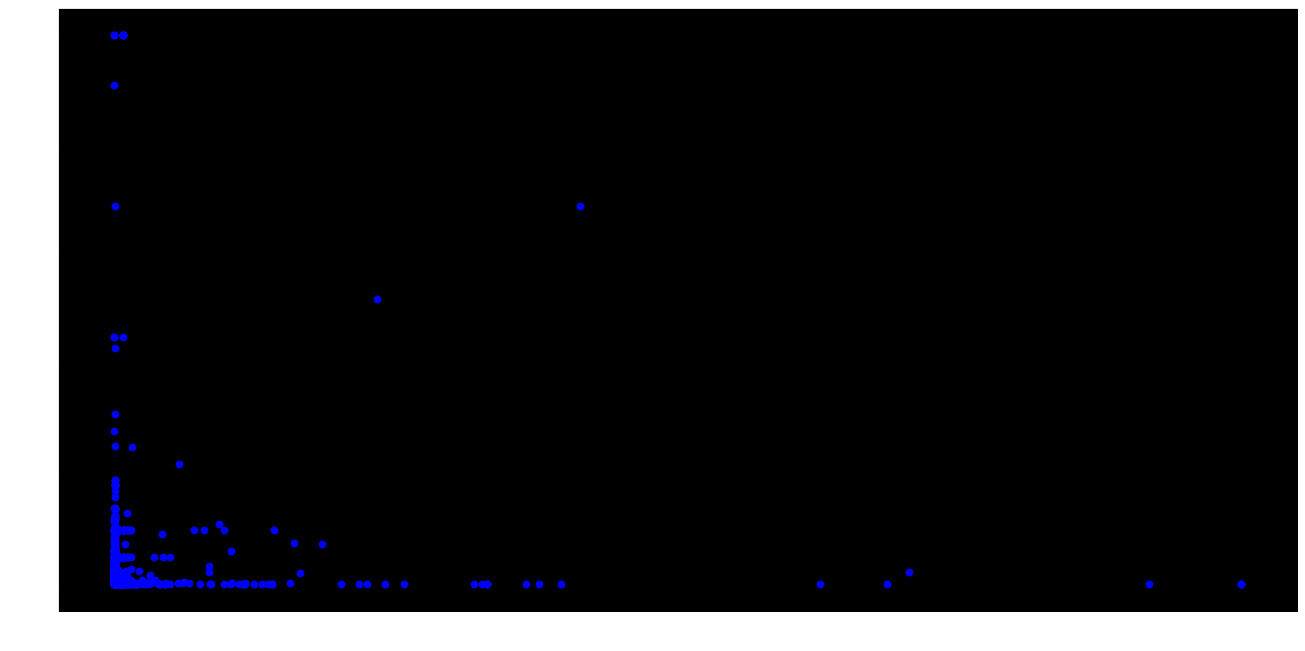

In [30]:
fig = plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(revenues, employees, c ="blue")
plt.show()

In [216]:
from scipy.stats.stats import pearsonr   

print(pearsonr(revenues, employees))

(0.45541682724791316, 0.0)


/var/folders/zj/zyfzmg117675d07g9x8fkjg40000gn/T/ipykernel_765/2952416837.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(array([2.073577e+06, 2.630000e+03, 3.894500e+04, 2.100000e+01,
        1.300000e+01, 9.000000e+00, 4.000000e+00, 4.000000e+00,
        2.000000e+00, 4.000000e+00, 3.000000e+00, 4.000000e+00,
        3.000000e+00, 6.000000e+00, 2.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 5.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00,
        0.000000e+00, 1.000000e+00, 6.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.00

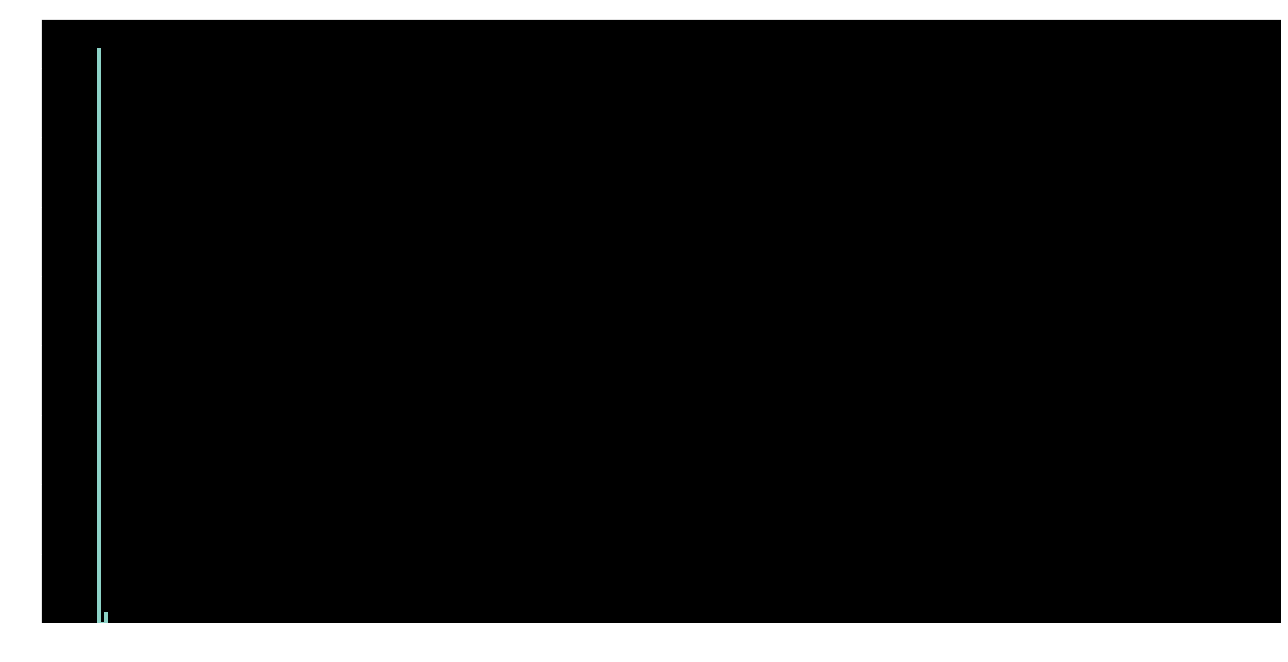

In [37]:
fig = plt.figure(figsize=(20, 10), dpi=80)
plt.hist(revenues,bins=300)
#plt.plot(revenues)

(array([1.984043e+06, 5.889700e+04, 3.567600e+04, 1.860000e+02,
        1.020000e+02, 6.600000e+01, 5.600000e+01, 4.000000e+01,
        1.900000e+01, 1.700000e+01, 2.116500e+04, 1.400000e+01,
        1.800000e+01, 8.000000e+00, 4.000000e+00, 5.000000e+00,
        2.000000e+00, 4.000000e+00, 7.000000e+00, 1.500000e+01,
        1.488900e+04, 1.000000e+00, 2.000000e+00, 2.000000e+00,
        5.000000e+00, 2.000000e+00, 1.000000e+00, 4.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        8.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.00

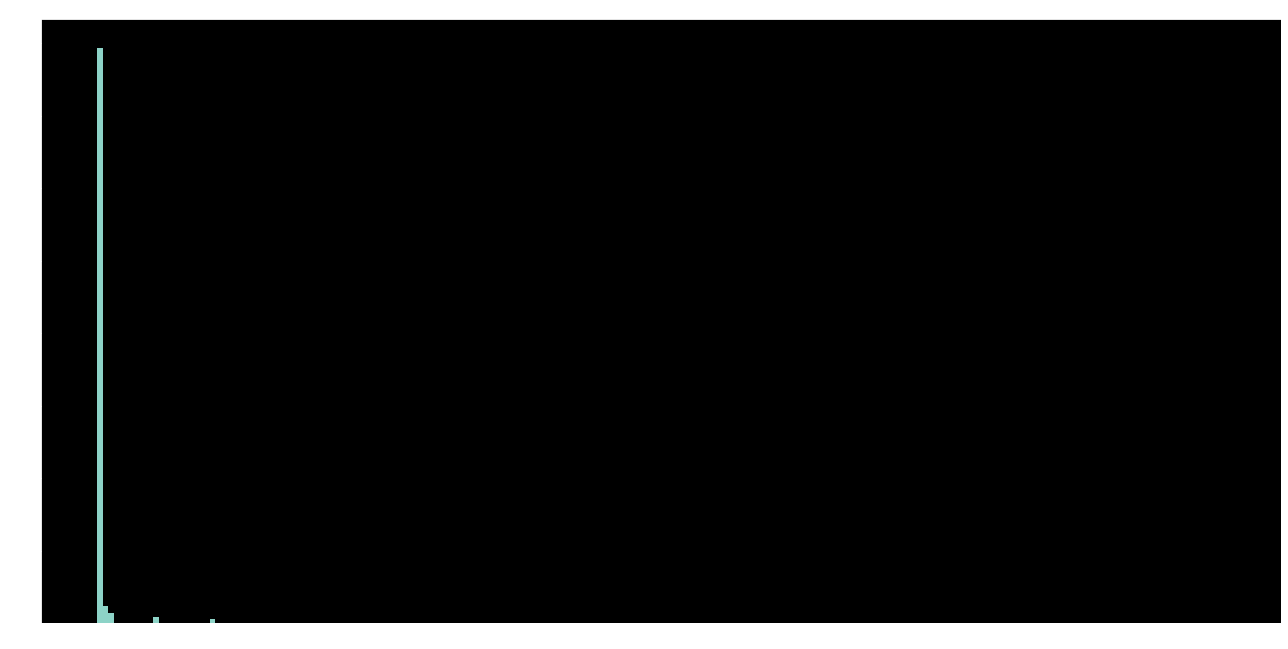

In [36]:
fig = plt.figure(figsize=(20, 10), dpi=80)
plt.hist(employees,bins=200)

In [83]:
def distribution_employees(num_employees):
    if (num_employees<50):
        return 0
    elif (num_employees>250):
        return 2
    else:
        return 1

def distribution_revenues(revenues):
    if (revenues<=1000000):
        return 1
    elif (revenues>1000000 and revenues<=10000000):
        return 2
    elif (revenues>10000000 and revenues<=50000000):
        return 3
    elif (revenues>10000000):
        return 4
    else:
        return 6

In [84]:
distribution_employees_list = [distribution_employees(emplyees_num) for emplyees_num in employees]
distribution_revenues_list = [distribution_revenues(revenue) for revenue in revenues]

(array([825678.,      0.,      0., 905170.,      0.,      0., 290287.,
             0.,      0.,  94151.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

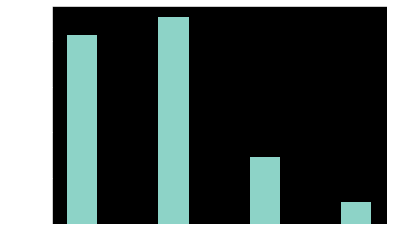

In [85]:
plt.hist(np.array(distribution_revenues_list))

(array([1283574.,       0.,       0.,       0.,       0.,  698708.,
              0.,       0.,       0.,  133004.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

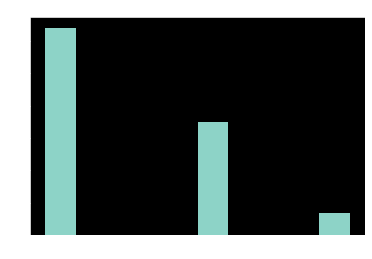

In [65]:
plt.hist(np.array(distribution_employees_list))

In [73]:
for i in reversed(revenues):
    if distribution_revenues(i)==6:
        print(i)
        break

1000000.0


In [87]:
"""fig = plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(np.array(distribution_revenues_list), np.array(distribution_employees_list), c ="blue")
plt.show()"""
from scipy.stats.stats import pearsonr  
print(pearsonr(np.array(distribution_revenues_list), np.array(distribution_employees_list)))

/var/folders/zj/zyfzmg117675d07g9x8fkjg40000gn/T/ipykernel_77404/4141655750.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(0.5440901554587452, 0.0)


In [88]:
print(len(distribution_employees_list))
print(len(distribution_revenues_list))

2115286
2115286


In [121]:
def get_size(num_employees, revenue ):
    revenue = distribution_revenues(revenue)
    num_employees = distribution_employees(num_employees)
    if (revenue ==1 or num_employees==1):
        return 0
    elif (revenue >= 3 or num_employees==3):
        return 2
    else: 
        return 1

In [122]:
sizes = [get_size(employees[i],revenues[i]) for i in range(len(employees))]

(array([1387474.,       0.,       0.,       0.,       0.,  596546.,
              0.,       0.,       0.,  131266.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

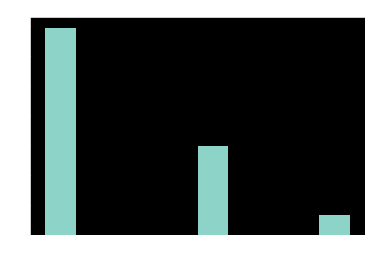

In [123]:
plt.hist(np.array(sizes))

In [124]:
size_df["size"] = sizes

In [130]:
size_df

,number_of_employees,annual_revenue_estimation,size
0,10000,1.000000e+09,2
1,5000,1.000000e+07,1
2,10,2.000000e+06,1
3,50,1.000000e+07,0
4,500,5.000000e+07,2
...,...,...,...
2845922,10,1.000000e+06,0
2845929,10,1.000000e+06,0
2845946,10,1.000000e+07,1
2845971,50,1.000000e+06,0
